In [1]:
from mlhelper import MLHelper, pd
from sklearn.datasets import load_breast_cancer

dataset = load_breast_cancer()
labels_dict = {
    0: {
        'name': 'malignant',
        'color': 'r',
        'marker': '^'
    },
    1: {
        'name': 'benign',
        'color': 'b',
        'marker': 'o'
    }
}
helper = MLHelper('Breast Cancer', labels_dict)
cancer_df = pd.DataFrame(
    data=dataset.data
    , columns=dataset.feature_names
)
cancer_df['target'] = dataset.target

[I 2025-04-27 05:04:51,143] A new study created in memory with name: no-name-b584c255-0e67-45ea-9d10-4fbea54104c8
[I 2025-04-27 05:04:55,268] Trial 0 finished with value: 0.961524500907441 and parameters: {'n_estimators': 6244, 'learning_rate': 0.04071002981220874, 'num_leaves': 10, 'max_depth': 4, 'min_child_samples': 25, 'subsample': 0.5099719459829893, 'colsample_bytree': 0.41925854609243723, 'reg_alpha': 0.002363322907264407, 'reg_lambda': 0.04503198137418725}. Best is trial 0 with value: 0.961524500907441.
[I 2025-04-27 05:04:55,781] Trial 1 finished with value: 0.9544464609800363 and parameters: {'n_estimators': 489, 'learning_rate': 0.05831046349233256, 'num_leaves': 59, 'max_depth': 11, 'min_child_samples': 27, 'subsample': 0.9008819330055533, 'colsample_bytree': 0.5839069451034666, 'reg_alpha': 0.0028334837522517673, 'reg_lambda': 6.424554828841575e-06}. Best is trial 0 with value: 0.961524500907441.
[I 2025-04-27 05:04:59,829] Trial 2 finished with value: 0.9407138535995159 a

Best trial:
Accuracy: 0.9754990925589837
Best hyperparameters:  {'n_estimators': 9135, 'learning_rate': 0.0016024396694159682, 'num_leaves': 37, 'max_depth': 4, 'min_child_samples': 68, 'subsample': 0.6677437866386281, 'colsample_bytree': 0.8431618884275375, 'reg_alpha': 5.5918714115327136e-05, 'reg_lambda': 6.17885129525208e-07}


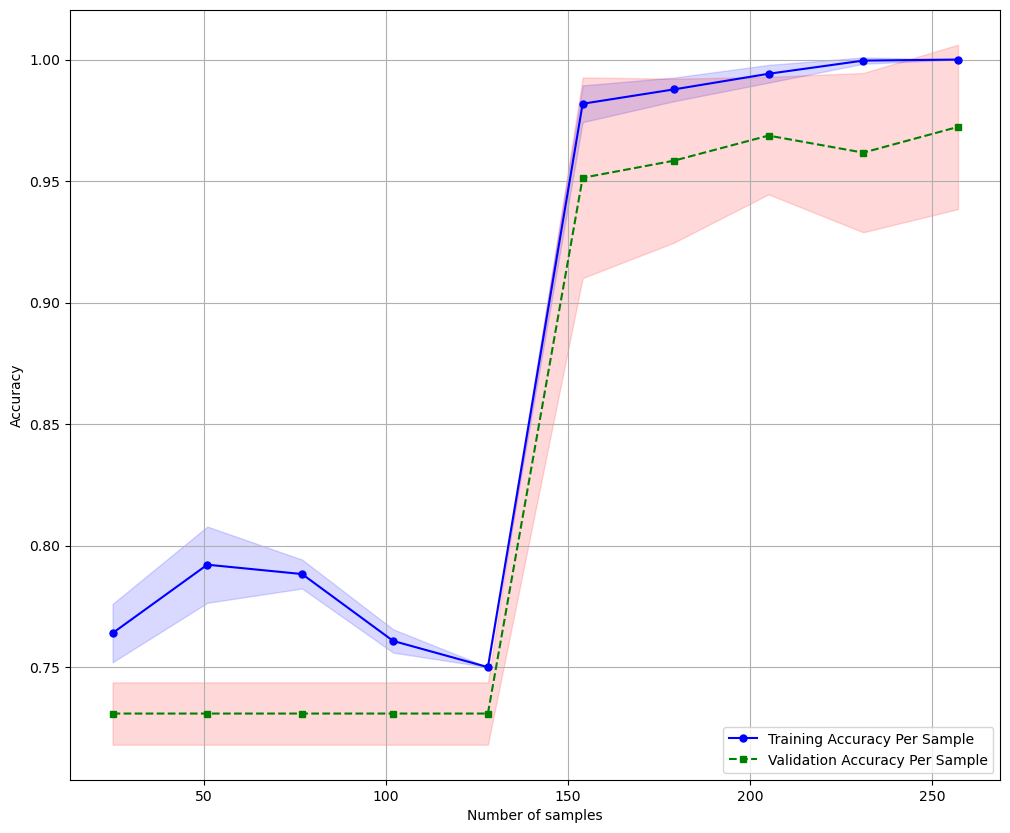

Confusion Matrix
[[ 59   5]
 [  0 107]]
Accuracy: 0.9708, Precision: 0.9554, Recall: 1.0000, F1: 0.9772, AUC: 0.9939


In [2]:
outlier_params = {'eps': 0.5, 'min_samples': 8, 'n_jobs': -1}
X_train, X_test, y_train, y_test = helper.get_split_data(cancer_df, test_size=0.3, shuffle=True, stratify=True)
X_train_transformed = helper.get_transformed_features(X_train)
X_test_transformed = helper.get_transformed_features(X_test)
X_train_scaled, X_test_scaled = helper.get_scaled_data(X_train_transformed, X_test_transformed, y_train, y_test, 'mm')

df_train = X_train_scaled.copy()
df_train['target'] = y_train
df_train_outlier_removed = helper.remove_outliers(df_train, 'iqr', outlier_params)

helper.train_and_evaluate_model('lgbm', df_train_outlier_removed.iloc[:,:-1], X_test_scaled, df_train_outlier_removed.iloc[:,-1], y_test)